<a href="https://colab.research.google.com/github/naorex/Python3rdGrade_Deep_Learning_Beginner/blob/main/Chapter05_CNN%E3%81%A7%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# カラー画像の(CIFAR-10)の学習

- カラー画像はモノクロ画像と比べてデータ量が3倍になる

In [1]:
!pip install japanize_matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c9b1840a6ba74ed0377bfd53b17d45741bcd777f574f55e2f95bd240fff71909
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, X_test = x_train / 255.0, x_test / 255.0
print("学習データ", x_train.shape)
print("検証データ", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
学習データ (50000, 32, 32, 3)
検証データ (10000, 32, 32, 3)


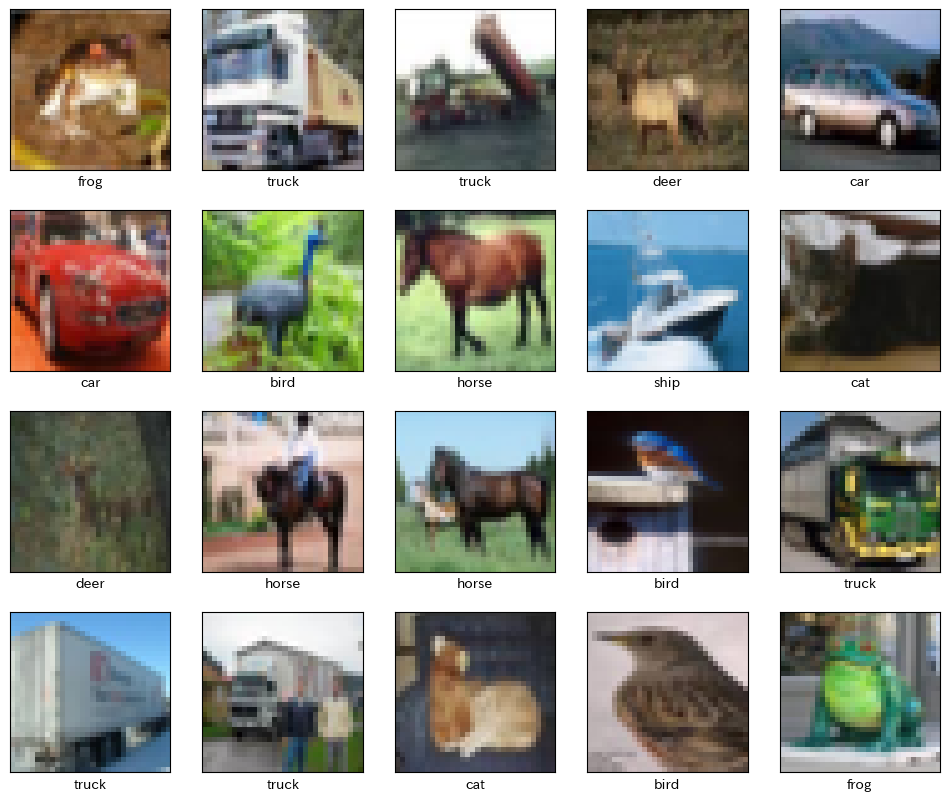

In [4]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def disp_data(xdata, ydata):
    fig = plt.figure(figsize=(12, 10))
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i])
        plt.xlabel(class_names[ydata[i][0]])
    plt.show()
disp_data(x_train, y_train)

In [5]:
model=keras.models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2686 - loss: 2.0305 - val_accuracy: 0.3306 - val_loss: 165.1913
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3633 - loss: 1.7657 - val_accuracy: 0.3717 - val_loss: 172.6986
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3856 - loss: 1.7286 - val_accuracy: 0.3697 - val_loss: 173.8049
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3930 - loss: 1.6972 - val_accuracy: 0.3712 - val_loss: 183.1429
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3980 - loss: 1.6859 - val_accuracy: 0.3620 - val_loss: 217.3985
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4014 - loss: 1.6687 - val_accuracy: 0.3581 - val_loss: 221.1057
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4067 - loss: 1.6587 - val_accuracy: 0.3716 - val_loss: 185.0621
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4080 - l

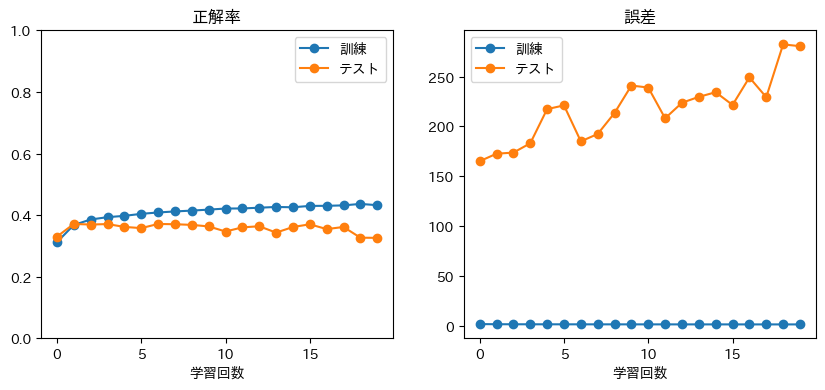

In [7]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


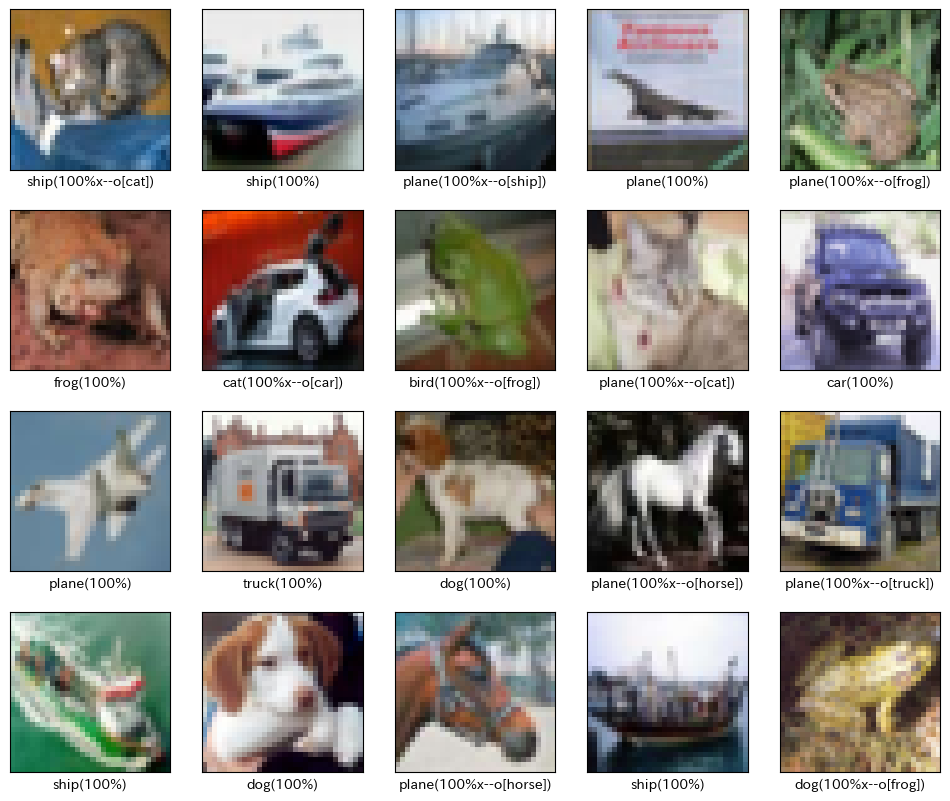

In [9]:
# データを渡して予測
pre = model.predict(x_test)
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="gray")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans=""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i][0]]+"]"
    lbl = f"{class_names[index]}({pct:.0%}{ans})"
    plt.xlabel(lbl)
plt.show()

- 学習が上手く行かないのは、1次元配列でデータを渡すため、画像としての特徴を捉えられていないから